<a href="https://colab.research.google.com/github/Suprim-Shakya/Learning_PyTorch/blob/main/Working_with_other_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.3.0+cu121'

In [4]:
w = 0.6
b = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = w * X + b
len(X), len(y)

(50, 50)

In [6]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})
  plt.show()

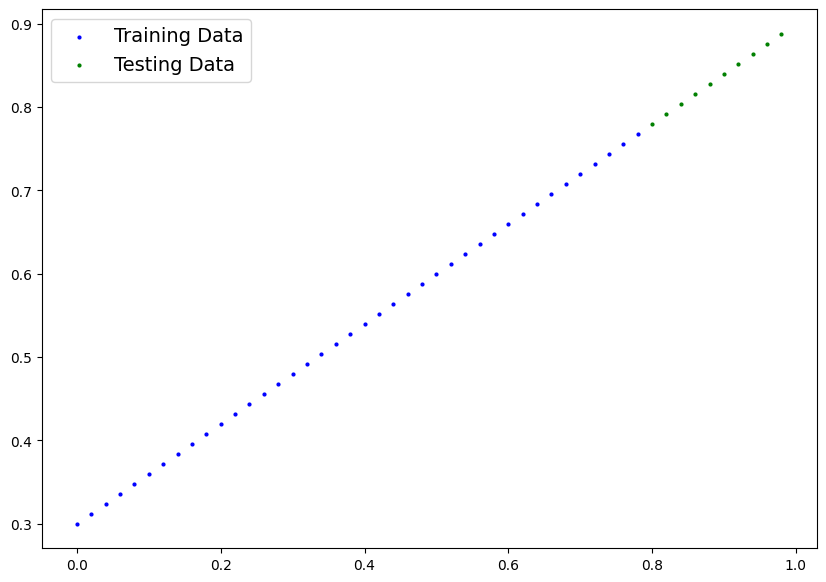

In [8]:
plot_predictions()

In [13]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weight * x + self.bias

In [18]:
random_seed = 40
torch.manual_seed(random_seed)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.9307], requires_grad=True),
 Parameter containing:
 tensor([-0.3482], requires_grad=True)]

In [19]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.9307])), ('bias', tensor([-0.3482]))])

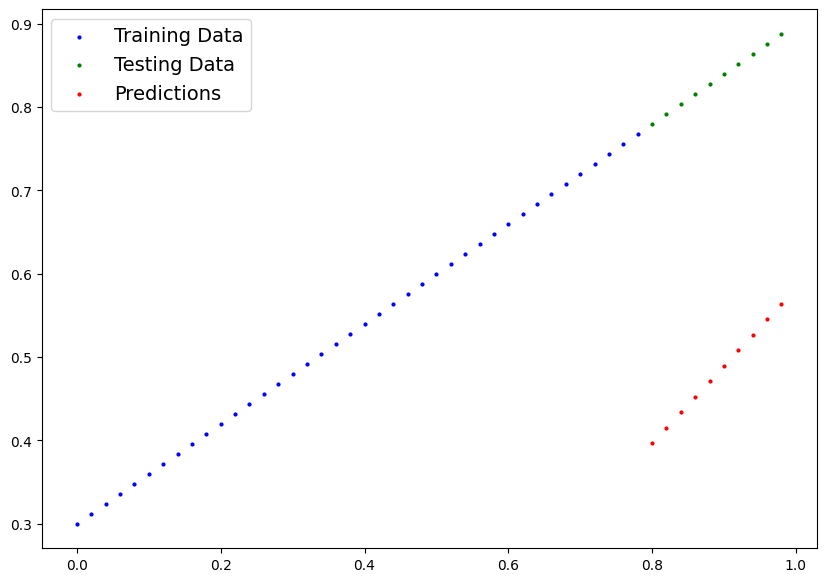

In [20]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [23]:
loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [28]:
torch.manual_seed(49)
epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss_train = loss(model_0(X_train), y_train)
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    loss_test = loss(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss_train.detach().numpy())
      test_loss_values.append(loss_test.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss_train} | MAE Test Loss: {loss_test} ")

Epoch: 0 | MAE Train Loss: 0.045101143419742584 | MAE Test Loss: 0.10444557666778564 
Epoch: 10 | MAE Train Loss: 0.04166880249977112 | MAE Test Loss: 0.09686002135276794 
Epoch: 20 | MAE Train Loss: 0.03823632746934891 | MAE Test Loss: 0.08858752250671387 
Epoch: 30 | MAE Train Loss: 0.03479752317070961 | MAE Test Loss: 0.08031503856182098 
Epoch: 40 | MAE Train Loss: 0.031366851180791855 | MAE Test Loss: 0.0727294385433197 
Epoch: 50 | MAE Train Loss: 0.027932697907090187 | MAE Test Loss: 0.06445695459842682 
Epoch: 60 | MAE Train Loss: 0.02449389174580574 | MAE Test Loss: 0.05618447810411453 
Epoch: 70 | MAE Train Loss: 0.021064912900328636 | MAE Test Loss: 0.048598818480968475 
Epoch: 80 | MAE Train Loss: 0.017629077658057213 | MAE Test Loss: 0.04032628610730171 
Epoch: 90 | MAE Train Loss: 0.014191416092216969 | MAE Test Loss: 0.03274064511060715 


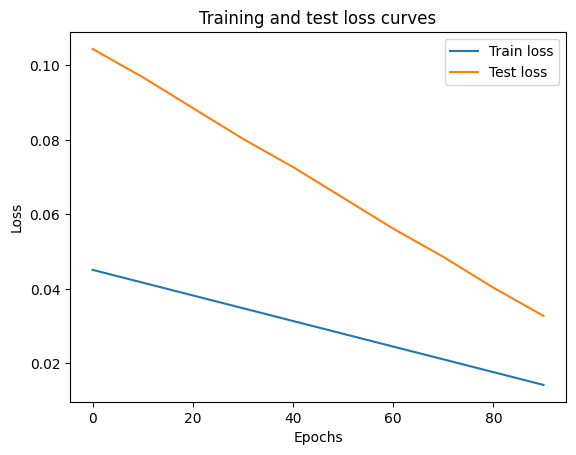

In [29]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [30]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {w}, bias: {b}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.6534])), ('bias', tensor([0.2773]))])

And the original values for weights and bias are:
weights: 0.6, bias: 0.3


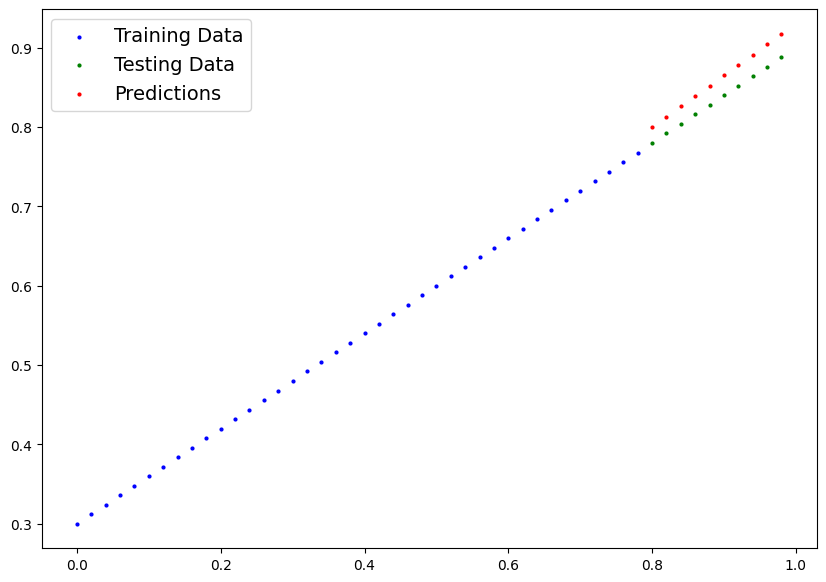

In [31]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)